Let's try and predict MPG with features(Cylinders Displacment, HP, Weight, Acceleration)


Imports for Linear regression

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('auto-mpg.csv')


In [3]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [4]:
df.shape 

(398, 9)

just the numerical. going to try with/without(maybe) model year and origin

In [5]:
df.describe()

,mpg,cylinders,displacement,weight,acceleration,model year,origin
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,5140.000000,24.800000,82.000000,3.000000


In [6]:
df.columns

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model year', 'origin', 'car name'],
      dtype='object')

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


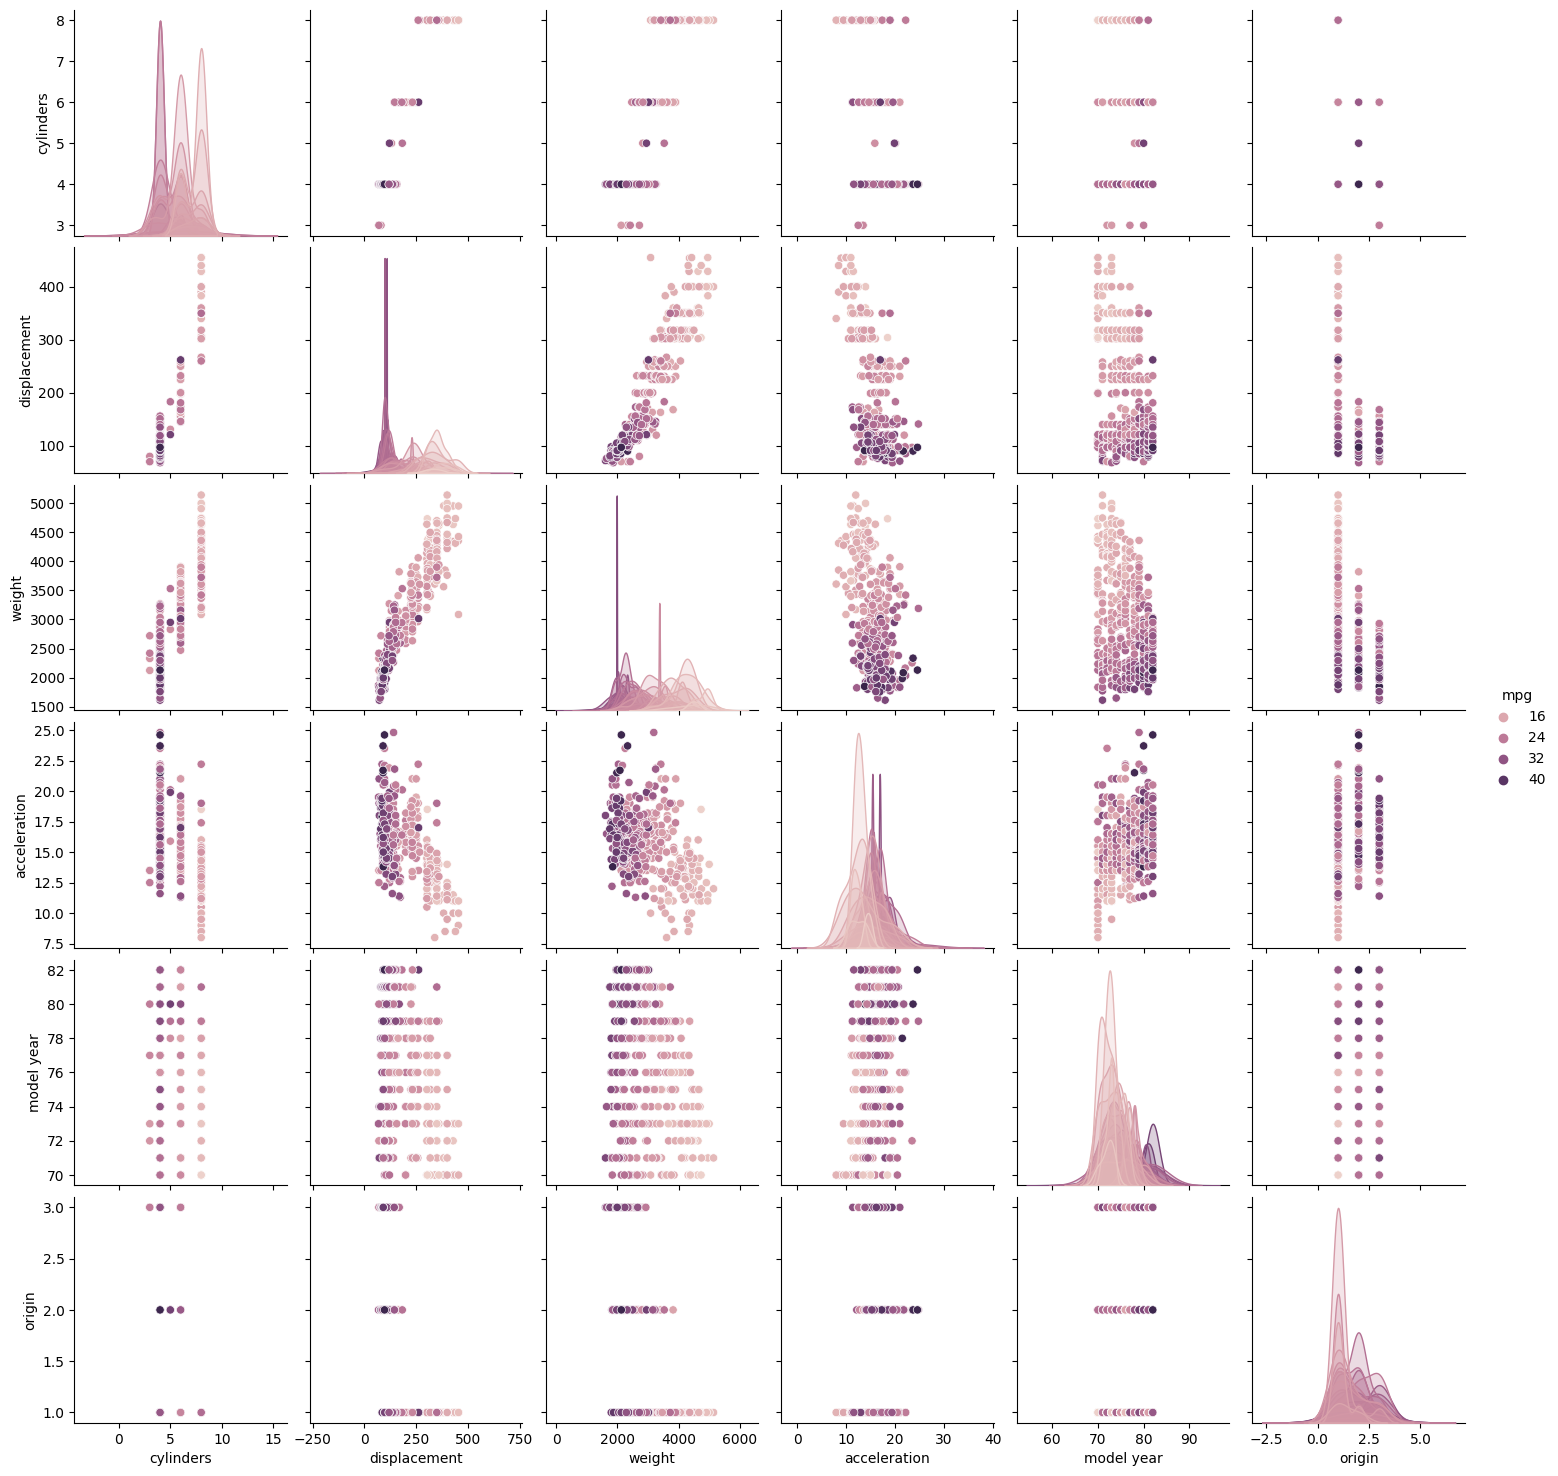

In [14]:
sns.pairplot(df, hue = 'mpg')

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


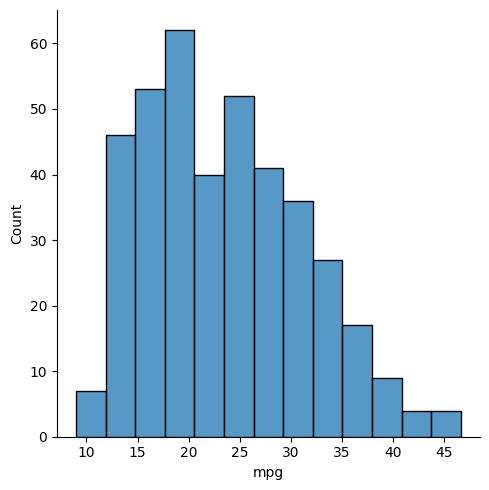

In [8]:
sns.displot(df['mpg'])

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


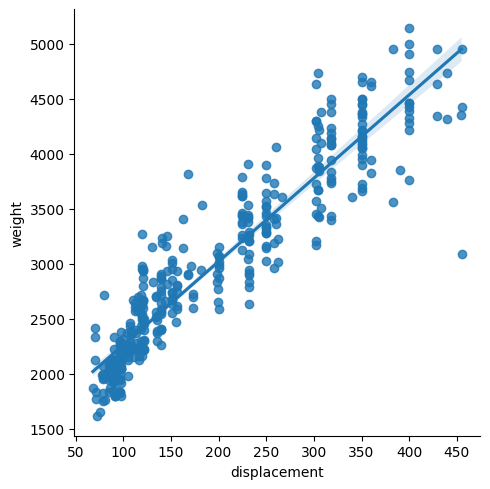

In [9]:
sns.lmplot(x = 'displacement', y = 'weight', data= df)

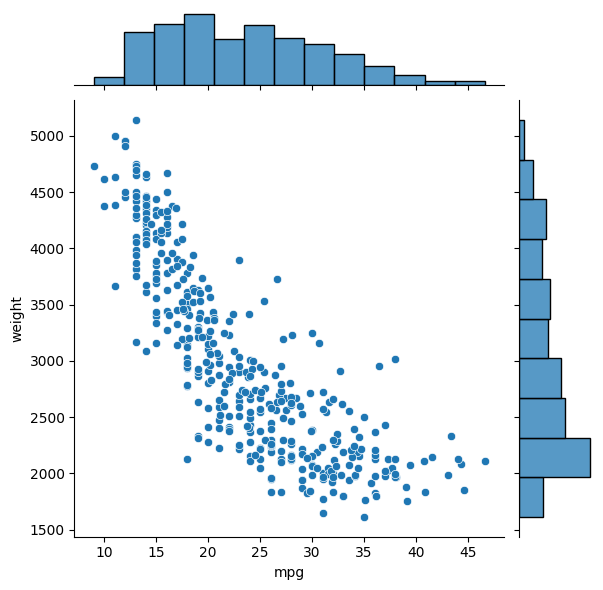

In [10]:
sns.jointplot(data=df,x='mpg',y='weight')

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


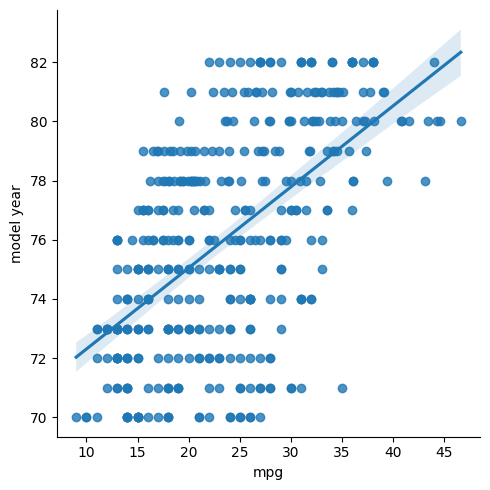

In [11]:
sns.lmplot(x = 'mpg', y = 'model year', data= df)

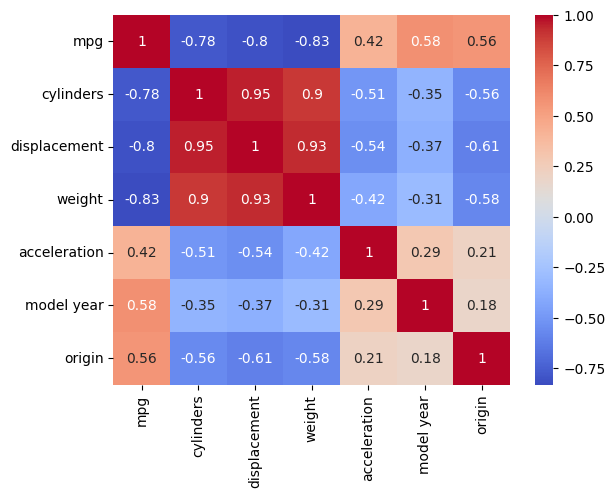

In [12]:
numeric_df = df.select_dtypes(include=['number'])

# Create a heatmap of correlations
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.show()

In [16]:
df.columns
rdf = df[df.eq('?').any(axis=1)]



df = df[~df.eq('?').any(axis=1)]

In [17]:
X = df[['cylinders', 'displacement', 'weight', 'acceleration', 'horsepower', 'model year', 'origin']]

In [18]:
y = df['mpg']

In [19]:
from sklearn.model_selection import train_test_split

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [21]:
from sklearn.linear_model import LinearRegression

In [22]:
lm = LinearRegression()

In [23]:
lm.fit(X_train, y_train)

LinearRegression()

In [24]:
print(lm.intercept_)

-17.798958118567217


In [25]:
lm.coef_

array([-0.368202  ,  0.02353484, -0.00689262,  0.07585953, -0.02478966,
        0.77154218,  1.28590802])

In [26]:
predictions = lm.predict(X_test)

Text(0, 0.5, 'Predicted Value')

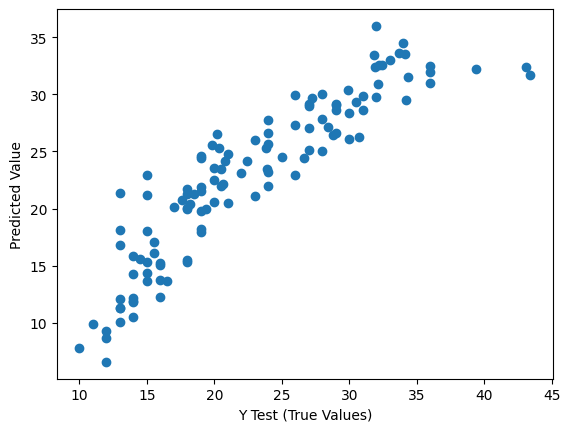

In [27]:
plt.scatter(y_test, predictions)
plt.xlabel('Y Test (True Values)')
plt.ylabel('Predicted Value')

In [28]:
from sklearn import metrics

In [29]:
print('MAE ', metrics.mean_absolute_error(y_test,predictions))
print('MSE ' , metrics.mean_squared_error(y_test,predictions))
print('RMSE ', np.sqrt(metrics.mean_squared_error(y_test,predictions)))

MAE  2.5149589493915863
MSE  10.610312854820535
RMSE  3.257347518276264


In [30]:
metrics.explained_variance_score(y_test,predictions)

0.8163912929100559

/var/folders/wz/wdfk34nj63sds6m2z08s4_9r0000gn/T/ipykernel_39272/2186843019.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_test-predictions, bins = 50)


<Axes: xlabel='mpg', ylabel='Density'>

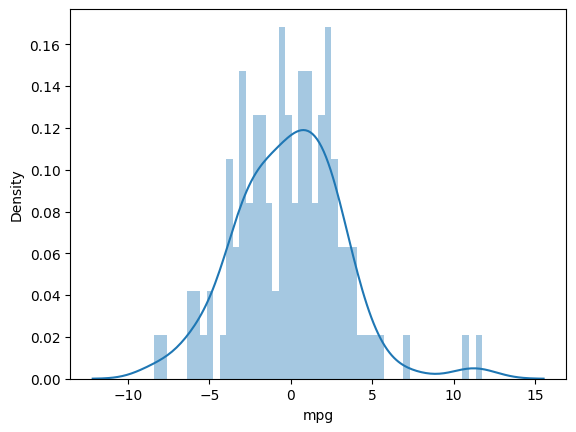

In [31]:
sns.distplot(y_test-predictions, bins = 50)

In [32]:
cdf = pd.DataFrame(lm.coef_,X.columns, columns = ['Coeff'])

In [33]:
cdf

,Coeff
cylinders,-0.368202
displacement,0.023535
weight,-0.006893
acceleration,0.075860
horsepower,-0.024790
model year,0.771542
origin,1.285908
